# George's Electronics Annual Sales Report !

In [38]:
#import libraries
import pandas as pd
import os 


## *Quick Note: Make sure to run all cells to ensure future cells can run properly (so libraries and past variables can be returned)

In [39]:
#read the file
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
# Integrate all the files together and see if they are all there
files = [file for file in os.listdir('Sales_Data')]

#intializing new dataframe
all_months_data = pd.DataFrame()

#lists through each months sales data that was downloaded
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])    
#concatenates each sales months data into one big 12 month data file
all_months_data.to_csv("all_data.csv", index = False)



In [40]:
#Read in updated dataframe 

all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


# Task 1:  Cleaning the Data

## Drop rows with NAN

In [41]:

nan_df = all_data[all_data.isna().any(axis = 1)]
nan_df.head()

# I am now able to see all the null data! 

# Now I will drop them all data with NAN
# 
all_data = all_data.dropna(how ='all')


### An error has occured where there is an 'or' in the months column so I will find it and delete it

In [42]:
# I want to add an order date column and used parsing to do so
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Now ensure all columns are correct type 

In [43]:
#Changing the quantity ordered and price each column to numerics in case some are strings
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])



## Task 2: Add Month Column for better sorting

In [44]:
#Month Column
"""
I will create a new Month column by parsing the string of Order Date
and then converting it to an integer for better retrieval and organization
"""

#Parser
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Task 3 : Add a sales column

In [45]:
# Multiplying quantity ordered by price of each to get sales
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head(5)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


# Q1:  What was the best month for sales? How much was earned that month?

In [46]:
#Group by function to display the data by months
results = all_data.groupby('Month').sum()

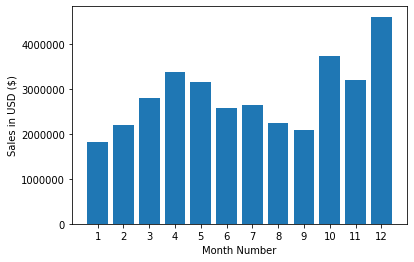

In [47]:
#import matplotlib function to display data visuals
import matplotlib.pyplot as plt

#set month range
months = range(1, 13)

#assign proper variables to bars
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')

plt.show()

In [16]:
#Answer Question Here

## Q2: What state had the highest number of Sales? Which state had the lowest

### Task 4: Add a state column

In [14]:
#Use the .apply which helps us run functions on data frames. 
# I will use .apply to parse and index the state of each column.

#the apply func below is saying for each value in the column split it by comma and grab 3rd element

#this function will recieve an address (formatted in purchase address column). Then parse it appropriately so it return the state
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['State'] = all_data['Purchase Address'].apply(lambda x: get_state(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,GA


In [15]:
# Groups the data by new State column and sum of sales

results = all_data.groupby('State').sum()
results

,Quantity Ordered,Price Each,Month,Sales
State,,,,
CA,83528,1.363290e+07,523845,1.371477e+07
GA,16602,2.779908e+06,104794,2.795499e+06
MA,22528,3.637410e+06,141112,3.661642e+06
ME,2750,4.471893e+05,17144,4.497583e+05
NY,27932,4.635371e+06,175741,4.664317e+06
OR,11303,1.860558e+06,70621,1.870732e+06
TX,27883,4.562501e+06,174449,4.587557e+06
WA,16553,2.733296e+06,104941,2.747755e+06


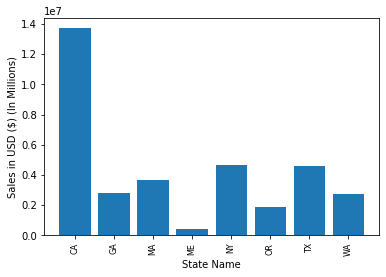

In [49]:
#using same code from best sales month just adjusted for states
import matplotlib.pyplot as plt

#From stack overflow, basically organizes the axes properly
states = [state for state, df in all_data.groupby('State')]

#Assign proper variables to the graph's bars and display final data visualization
plt.bar(states, results['Sales'])
plt.xticks(states, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD ($) (In Millions)')
plt.xlabel('State Name')

plt.show()

### We can see that California has the most sales! This will allow a business to make all sorts of decisions to increase sales and productivity. Where to open up new shops, where to target online ads, where to send out more flyers,etc. 

## Q3: What is the optimal time for advertisments be displayed? 

In [ ]:
## To make this work I have to look at the order date and aggregate the order dates over a 24 hr period
## Convert order_date to date/time format (Pandas documentation)

In [20]:
#From Pandas documentation
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [21]:
#NEW date/time format will display
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,NY
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,NY
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,NY
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,CA
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,GA


In [32]:
#Create seperate columns for hour and min. Much easier with this new format
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,GA,12,38


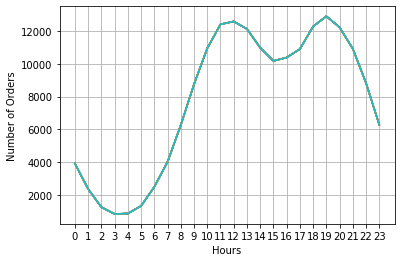

In [33]:
# for each hour, then group by hours
hours = [hour for hour, df in all_data.groupby('Hour')]

#Assign proper variables to bars. Also include grid so data is easier to read from visualization
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.grid()
plt.xlabel('Hours')
plt.xticks(hours)
plt.ylabel('Number of Orders')

plt.show()

### This data shows us that the peak order times are 11am and 7pm. This could be people order around noon during a lunch break or at 7pm after work. Regardless business owners should display adevrtisments at these times because it will gross the most sales. A lot of money can be saved by reducing ads that run at less optimal times (12-10am). 